# Practica 7

## Modulos


In [1]:
import pandas as pd
import numpy as np
import cufflinks as cf
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression, Lars, ElasticNet, Lasso, Ridge, BayesianRidge

cf.go_offline()
pd.set_option('display.float_format', lambda x: "{:,.5f}".format(x))

## Dataset

In [2]:
df= pd.read_csv("winequality-red.csv",sep=';')

In [3]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.40000,0.70000,0.00000,1.90000,0.07600,11.00000,34.00000,0.99780,3.51000,0.56000,9.40000,5
1,7.80000,0.88000,0.00000,2.60000,0.09800,25.00000,67.00000,0.99680,3.20000,0.68000,9.80000,5
2,7.80000,0.76000,0.04000,2.30000,0.09200,15.00000,54.00000,0.99700,3.26000,0.65000,9.80000,5
3,11.20000,0.28000,0.56000,1.90000,0.07500,17.00000,60.00000,0.99800,3.16000,0.58000,9.80000,6
4,7.40000,0.70000,0.00000,1.90000,0.07600,11.00000,34.00000,0.99780,3.51000,0.56000,9.40000,5


## Data Wrangling

### Clasificación variables

In [4]:
ls_cont=[x for x in df.columns if x != "quality"]
target = "quality"

### Valores nulos

In [5]:
df.isna().mean()

fixed acidity          0.00000
volatile acidity       0.00000
citric acid            0.00000
residual sugar         0.00000
chlorides              0.00000
free sulfur dioxide    0.00000
total sulfur dioxide   0.00000
density                0.00000
pH                     0.00000
sulphates              0.00000
alcohol                0.00000
quality                0.00000
dtype: float64

### Análisis continuo

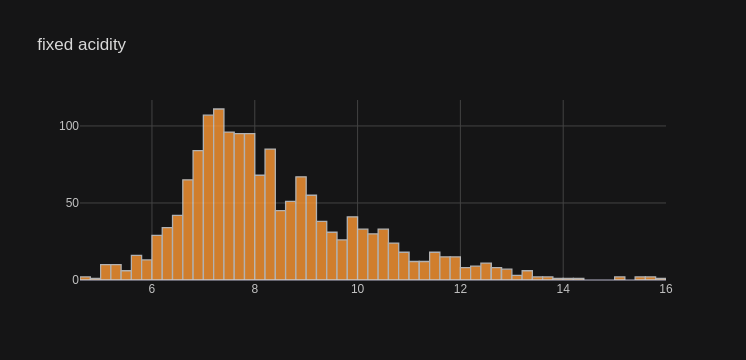

None

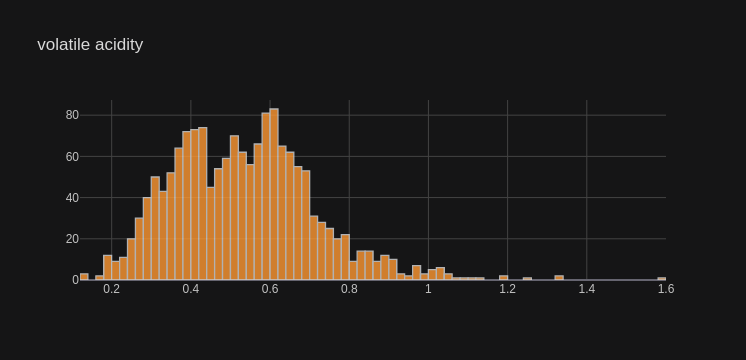

None

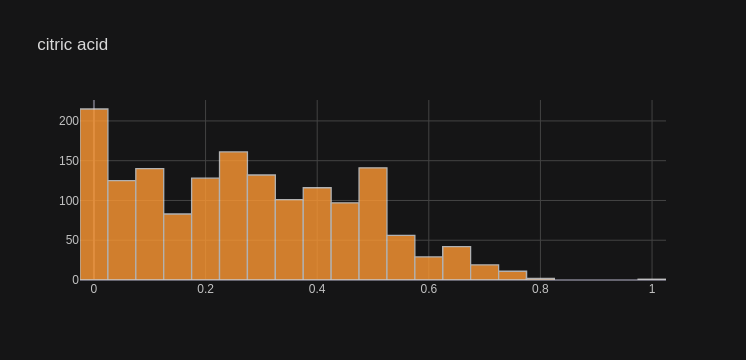

None

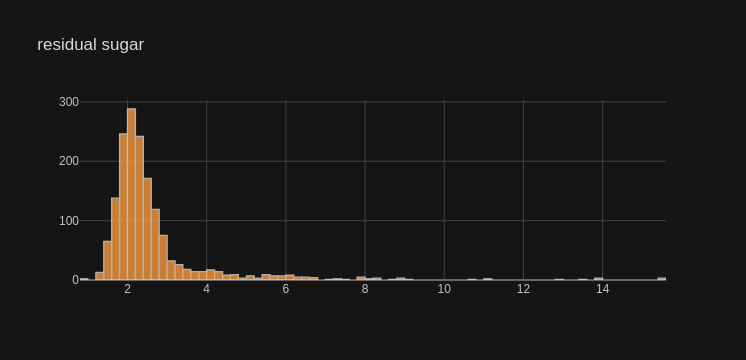

None

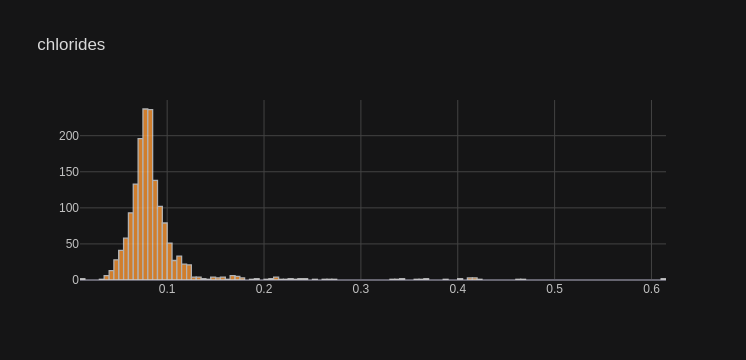

None

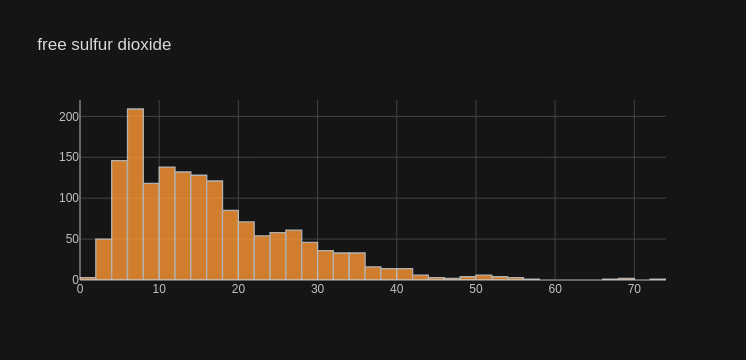

None

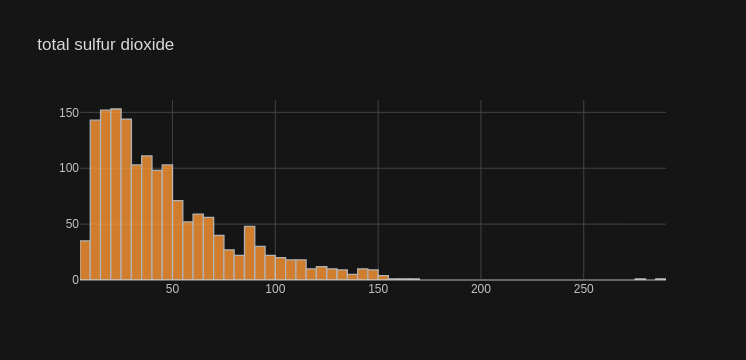

None

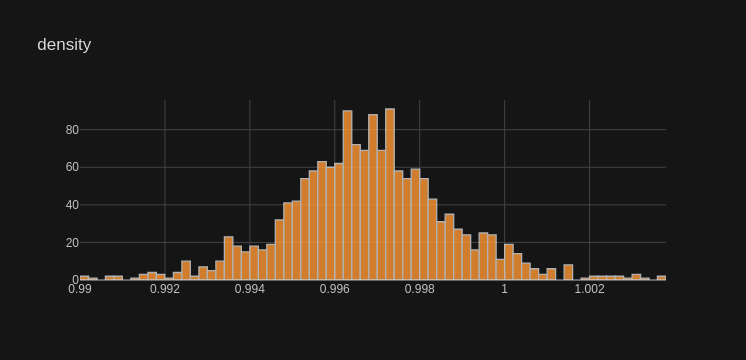

None

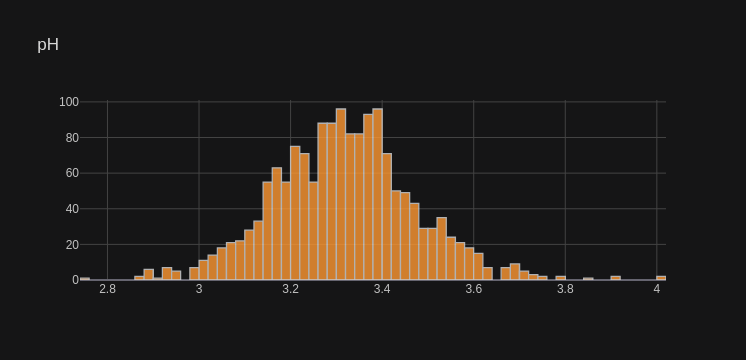

None

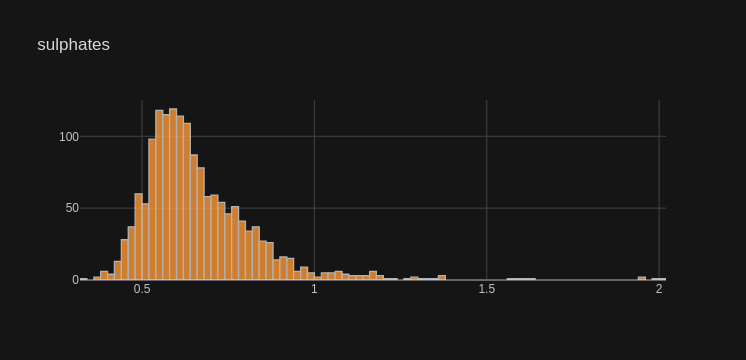

None

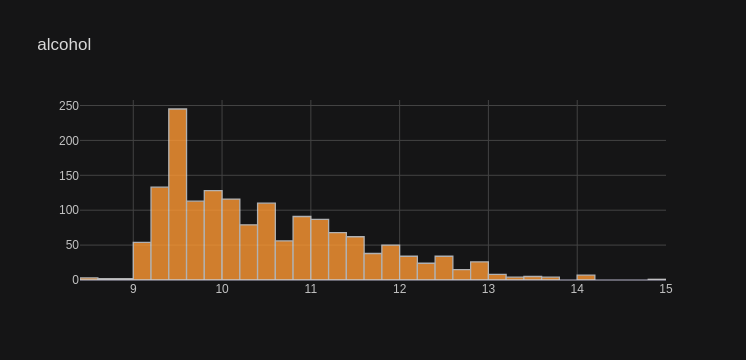

None

In [6]:
for feature in ls_cont:
    df[feature] = df[feature].astype(float)
    display(df[feature].iplot(kind="hist", theme="solar", title=feature))

In [7]:
df[ls_cont].describe(percentiles=[0.95, 0.99])

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
count,"1,599.00000","1,599.00000","1,599.00000","1,599.00000","1,599.00000","1,599.00000","1,599.00000","1,599.00000","1,599.00000","1,599.00000","1,599.00000"
mean,8.31964,0.52782,0.27098,2.53881,0.08747,15.87492,46.46779,0.99675,3.31111,0.65815,10.42298
std,1.74110,0.17906,0.19480,1.40993,0.04707,10.46016,32.89532,0.00189,0.15439,0.16951,1.06567
min,4.60000,0.12000,0.00000,0.90000,0.01200,1.00000,6.00000,0.99007,2.74000,0.33000,8.40000
50%,7.90000,0.52000,0.26000,2.20000,0.07900,14.00000,38.00000,0.99675,3.31000,0.62000,10.20000
95%,11.80000,0.84000,0.60000,5.10000,0.12610,35.00000,112.10000,1.00000,3.57000,0.93000,12.50000
99%,13.30000,1.02000,0.70020,8.30600,0.36016,50.02000,145.00000,1.00151,3.70020,1.26040,13.40000
max,15.90000,1.58000,1.00000,15.50000,0.61100,72.00000,289.00000,1.00369,4.01000,2.00000,14.90000


In [8]:
dc_ol = {var: df[var].quantile(0.99) for var in ls_cont}

In [9]:
df_reg = df.copy()

In [10]:
for var in ls_cont:
    df_reg = df_reg[df_reg[var]<=dc_ol[var]]

In [11]:
df_reg.shape[0]/df.shape[0]

0.9143214509068167

## Modelado

### LARS

In [12]:
X= df_reg[ls_cont]
y= df_reg[target]

In [13]:
larsreg = Lars()

In [14]:
larsreg=larsreg.fit(X,y)

/home/gustavo/.local/lib/python3.8/site-packages/sklearn/linear_model/_base.py:133: FutureWarning:

The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Lars())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)





In [15]:
ls_res = cross_val_score(estimator = larsreg, X=X, y=y, cv=4, n_jobs=-1, scoring="r2")

/home/gustavo/.local/lib/python3.8/site-packages/sklearn/linear_model/_base.py:133: FutureWarning:

The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Lars())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)



/home/gustavo/.local/lib/python3.8/site-packages/sklearn/linear_model/_base.py:133: FutureWarning:

The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipe

In [16]:
ls_res

array([0.25003555, 0.34871537, 0.36861723, 0.22446438])

In [17]:
np.mean(ls_res), np.std(ls_res)

(0.29795813374175106, 0.06177967071909584)

In [18]:
dc_scores={}
dc_scores.update({str(larsreg).split("(")[0]: np.mean(ls_res)})

In [19]:
pd.DataFrame(zip(X.columns, larsreg.coef_)).sort_values(by=1)

,0,1
7,density,-14.13454
4,chlorides,-1.37549
1,volatile acidity,-0.96437
8,pH,-0.52869
2,citric acid,-0.25701
6,total sulfur dioxide,-0.00331
3,residual sugar,-0.00208
5,free sulfur dioxide,0.00379
0,fixed acidity,0.01071
10,alcohol,0.29918


### Lasso

In [93]:
lassreg = Lasso(alpha=1/100)

In [94]:
lassreg.fit(X, y)

Lasso(alpha=0.01)

In [95]:
ls_res = cross_val_score(estimator = lassreg, X=X, y=y, cv=4, n_jobs=-1, scoring="r2")

In [96]:
ls_res

array([0.30701235, 0.33270414, 0.33997806, 0.1822449 ])

In [97]:
np.mean(ls_res), np.std(ls_res)

(0.29048486134261503, 0.06368102428098946)

In [98]:
pd.DataFrame(zip(X.columns, lassreg.coef_)).sort_values(by=1)

,0,1
1,volatile acidity,-0.64182
3,residual sugar,-0.00909
6,total sulfur dioxide,-0.00362
2,citric acid,0.00000
4,chlorides,-0.00000
7,density,-0.00000
8,pH,-0.00000
5,free sulfur dioxide,0.00534
0,fixed acidity,0.02708
10,alcohol,0.32028


In [184]:
dc_scores.update({str(lassreg).split("(")[0]: np.mean(ls_res)})
dc_scores

{'Lars': 0.29795813374175106,
 'Lasso': 0.30192751997036216,
 'Ridge': 0.30192751997036216,
 'ElasticNet': 0.30171720867300755,
 'BayesianRidge': 0.30192751997036216}

De aqui tomamos que el valor de $\frac{1}{100}$ nos da un mejor $R²$ sin aumentar mucho la desviación estandar

In [25]:
for i in range(1, 1000, 10):
    lasso = Lasso(alpha=i/100)
    lasso.fit(X, y)
    ls_res = cross_val_score(estimator = lasso, X=X, y=y, cv=4, n_jobs=-1, scoring="r2")
    print(i, "{:,.2%}".format(np.mean(ls_res)), "{:,.2f}".format(np.std(ls_res)))

1 29.05% 0.06
11 18.57% 0.08
21 11.73% 0.08
31 3.27% 0.09
41 -0.64% 0.07
51 -1.07% 0.07
61 -1.41% 0.07
71 -1.48% 0.07
81 -1.52% 0.07
91 -1.57% 0.07
101 -1.63% 0.07
111 -1.69% 0.07
121 -1.75% 0.07
131 -1.82% 0.07
141 -1.89% 0.07
151 -1.97% 0.07
161 -2.05% 0.07
171 -2.13% 0.07
181 -2.22% 0.07
191 -2.31% 0.07
201 -2.41% 0.07
211 -2.51% 0.07
221 -2.61% 0.07
231 -2.72% 0.07
241 -2.83% 0.07
251 -2.95% 0.07
261 -3.07% 0.07
271 -3.20% 0.07
281 -3.33% 0.07
291 -3.46% 0.07
301 -3.60% 0.07
311 -3.74% 0.07
321 -3.89% 0.07
331 -4.04% 0.07
341 -4.19% 0.07
351 -4.35% 0.07
361 -4.51% 0.07
371 -4.68% 0.07
381 -4.85% 0.07
391 -5.03% 0.07
401 -5.21% 0.07
411 -5.39% 0.07
421 -5.58% 0.07
431 -5.77% 0.07
441 -5.97% 0.07
451 -6.17% 0.07
461 -6.37% 0.07
471 -6.49% 0.07
481 -6.57% 0.07
491 -6.62% 0.07
501 -6.68% 0.07
511 -6.74% 0.07
521 -6.75% 0.07
531 -6.75% 0.07
541 -6.75% 0.07
551 -6.75% 0.07
561 -6.75% 0.07
571 -6.76% 0.07
581 -6.76% 0.07
591 -6.76% 0.07
601 -6.77% 0.07
611 -6.78% 0.07
621 -6.78% 0.07
631 

### Ridge

In [113]:
ridgereg = Ridge(alpha=5)

In [114]:
ridgereg.fit(X, y)

Ridge(alpha=5)

In [115]:
ls_res = cross_val_score(estimator = ridgereg, X=X, y=y, cv=4, n_jobs=-1, scoring="r2")

In [116]:
ls_res

array([0.28088448, 0.34862992, 0.36364952, 0.21634599])

In [117]:
np.mean(ls_res), np.std(ls_res)

(0.302377477194786, 0.058644946746624904)

In [118]:
pd.DataFrame(zip(X.columns, ridgereg.coef_)).sort_values(by=1)

,0,1
1,volatile acidity,-0.84967
8,pH,-0.40779
4,chlorides,-0.23296
2,citric acid,-0.10645
3,residual sugar,-0.01578
7,density,-0.00445
6,total sulfur dioxide,-0.00351
0,fixed acidity,0.00329
5,free sulfur dioxide,0.00483
10,alcohol,0.32079


In [183]:
dc_scores.update({str(ridgereg).split("(")[0]: np.mean(ls_res)})
dc_scores

{'Lars': 0.29795813374175106,
 'Lasso': 0.29048486134261503,
 'Ridge': 0.30192751997036216,
 'ElasticNet': 0.30171720867300755,
 'BayesianRidge': 0.30192751997036216}

De aqui tomamos que el valor de 5 nos da un mejor $R²$ sin aumentar mucho la desviación estandar

In [33]:
for i in range(0, 1000, 5):
    ridgereg = Ridge(alpha=i)
    ridgereg.fit(X, y)
    ls_res = cross_val_score(estimator = ridgereg, X=X, y=y, cv=4, n_jobs=-1, scoring="r2")
    print(i, "{:,.2%}".format(np.mean(ls_res)), "{:,.2f}".format(np.std(ls_res)))

0 29.80% 0.06
5 30.24% 0.06
10 29.88% 0.06
15 29.46% 0.06
20 29.05% 0.06
25 28.66% 0.06
30 28.31% 0.06
35 27.99% 0.06
40 27.70% 0.06
45 27.43% 0.06
50 27.19% 0.07
55 26.96% 0.07
60 26.75% 0.07
65 26.56% 0.07
70 26.38% 0.07
75 26.21% 0.07
80 26.06% 0.07
85 25.91% 0.07
90 25.77% 0.07
95 25.64% 0.07
100 25.52% 0.07
105 25.40% 0.07
110 25.29% 0.07
115 25.18% 0.07
120 25.08% 0.07
125 24.98% 0.07
130 24.89% 0.07
135 24.79% 0.07
140 24.71% 0.07
145 24.62% 0.07
150 24.54% 0.07
155 24.46% 0.07
160 24.38% 0.07
165 24.31% 0.07
170 24.24% 0.07
175 24.16% 0.07
180 24.09% 0.07
185 24.03% 0.07
190 23.96% 0.07
195 23.89% 0.07
200 23.83% 0.07
205 23.77% 0.07
210 23.71% 0.07
215 23.65% 0.07
220 23.59% 0.07
225 23.53% 0.07
230 23.47% 0.07
235 23.41% 0.07
240 23.36% 0.07
245 23.30% 0.07
250 23.25% 0.07
255 23.19% 0.07
260 23.14% 0.07
265 23.09% 0.07
270 23.04% 0.07
275 22.98% 0.07
280 22.93% 0.07
285 22.88% 0.07
290 22.83% 0.07
295 22.78% 0.07
300 22.73% 0.07
305 22.68% 0.07
310 22.64% 0.07
315 22.59% 0.0

### Elastic Net

In [169]:
elasnet = ElasticNet(alpha=.0001, l1_ratio=0.1)

In [170]:
elasnet.fit(X, y)

ElasticNet(alpha=0.0001, l1_ratio=0.1)

In [158]:
ls_res = cross_val_score(estimator = elasnet, X=X, y=y, cv=4, n_jobs=-1, scoring="r2")

In [159]:
ls_res

array([0.2536087 , 0.34938059, 0.3737187 , 0.23016085])

In [160]:
np.mean(ls_res), np.std(ls_res)

(0.30171720867300755, 0.06101383670412471)

In [162]:
dc_scores.update({str(elasnet).split("(")[0]: np.mean(ls_res)})
dc_scores

{'Lars': 0.29795813374175106,
 'Lasso': 0.29048486134261503,
 'Ridge': 0.302377477194786,
 'ElasticNet': 0.30171720867300755,
 'BayesianRidge': 0.30192751997036216}

A la hora de hacer validaciones no converge en todas, se recomienda no correr

In [163]:
df_res = pd.DataFrame(columns=["alpha", "l1_ratio", "score", "std"])
contador = 0
for i in range(1, 1000, 10):
    for j in range(10):
        elasnet = ElasticNet(alpha=i/100, l1_ratio=j/11, max_iter=1000)
        elasnet.fit(X, y)
        ls_res = cross_val_score(estimator = elasnet, X=X, y=y, cv=4, n_jobs=-1, scoring="r2")
        df_res.loc[contador, "alpha"] = i
        df_res.loc[contador, "l1_ratio"] = j
        df_res.loc[contador, "score"] = np.mean(ls_res)
        df_res.loc[contador, "std"] = np.std(ls_res)
        contador += 1

/home/gustavo/.local/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:645: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.040e+02, tolerance: 9.145e-02 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.

/home/gustavo/.local/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:645: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.355e+02, tolerance: 7.188e-02 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instea

In [164]:
df_res.sort_values(by = "score", ascending=False)

,alpha,l1_ratio,score,std
0,1,0,0.29802,0.05958
1,1,1,0.29737,0.05958
2,1,2,0.29663,0.05954
3,1,3,0.29588,0.05974
4,1,4,0.29518,0.06023
...,...,...,...,...
958,951,8,-0.06829,0.06999
959,951,9,-0.06829,0.06999
968,961,8,-0.06829,0.06999
969,961,9,-0.06829,0.06999


### Bayessian Regression

In [176]:
bayreg = BayesianRidge()

In [177]:
bayreg.fit(X, y)

BayesianRidge()

In [178]:
ls_res = cross_val_score(estimator = bayreg, X=X, y=y, cv=4, n_jobs=-1, scoring="r2")

In [179]:
ls_res

array([0.26209135, 0.35104545, 0.36950739, 0.2250659 ])

In [180]:
np.mean(ls_res), np.std(ls_res)

(0.30192751997036216, 0.0601544643198461)

In [181]:
pd.DataFrame(zip(X.columns, bayreg.coef_)).sort_values(by=1)

,0,1
1,volatile acidity,-0.95038
4,chlorides,-0.64420
8,pH,-0.52735
2,citric acid,-0.22032
7,density,-0.01252
3,residual sugar,-0.01209
6,total sulfur dioxide,-0.00339
0,fixed acidity,0.00004
5,free sulfur dioxide,0.00427
10,alcohol,0.31716


In [182]:
dc_scores.update({str(bayreg).split("(")[0]: np.mean(ls_res)})
dc_scores

{'Lars': 0.29795813374175106,
 'Lasso': 0.29048486134261503,
 'Ridge': 0.302377477194786,
 'ElasticNet': 0.30171720867300755,
 'BayesianRidge': 0.30192751997036216}

## Interpretación

La elección del mejor modelo utilizando $R²$ sería ridge a la cual se le acerca bastante  regresión bayesiana pero aún así tiene mayor desviación que Ridge.  
Aunque hay que hacer la distinción de que todos tienen valores muy cercanos entre si.

Tambien hay que ser mención que Lars le da muy poco valor a ciertas variables las cuales las hace despreciables e implica un resultado similar con menor cantidad de información.


Por tanto si priorizamos la cantidad de información Lars sería la opción(además que no son tantas variables) y Ridge por $R²$ este es mejor que Lasso solo por poco al amoldarse mejor la pendiente al cuadrado que en su valor absoluto.

Entonces me decantaría por LARS

## Cuadro resumen

In [192]:
resul = pd.DataFrame(columns=[])
alfas = pd.DataFrame(columns=[])
param = pd.DataFrame(columns=[])
R = pd.DataFrame(columns=[])
for model in [larsreg, ridgereg, lassreg, elasnet, bayreg]:
    resul[str(model).split("(")[0]] = model.coef_
    alfas[str(model).split("(")[0]] = [model.intercept_]
    param[str(model).split("(")[0]] = [str(model).split("(")[1].split(")")[0]]
    R[str(model).split("(")[0]] = [dc_scores[str(model).split("(")[0]]]

In [194]:
resul["features"] = ls_cont
resul = resul.set_index("features")
alfas["features"] = ["intercepto"]
alfas = alfas.set_index("features")
param["features"] = ["parameters"]
param= param.set_index("features")
R["features"] = ["R^2"]
R= R.set_index("features")

In [195]:
resul = alfas.append(resul).append(param).append(R)

In [196]:
resul

,Lars,Ridge,Lasso,ElasticNet,BayesianRidge
features,,,,,
intercepto,18.27068,3.61936,2.12950,4.36658,4.10275
fixed acidity,0.01071,0.00329,0.02708,-0.00161,0.00004
volatile acidity,-0.96437,-0.84967,-0.64182,-0.97369,-0.95038
citric acid,-0.25701,-0.10645,0.00000,-0.25563,-0.22032
residual sugar,-0.00208,-0.01578,-0.00909,-0.00980,-0.01209
chlorides,-1.37549,-0.23296,-0.00000,-1.25632,-0.64420
free sulfur dioxide,0.00379,0.00483,0.00534,0.00397,0.00427
total sulfur dioxide,-0.00331,-0.00351,-0.00362,-0.00336,-0.00339
density,-14.13454,-0.00445,-0.00000,-0.00000,-0.01252
